<a href="https://colab.research.google.com/github/Arslonbekjon/ML-Amaliyot-Tashkent-uy-narxlari/blob/main/Tashkent_MLga_tayyorgarlik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn


In [2]:
URL = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv"
df = pd.read_csv(URL)
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [3]:
df.isnull().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

In [4]:
dfprice=df[df['price']=="Договорная"].index
df.drop(dfprice,inplace=True)
df.shape

(7466, 7)

In [5]:
df['price']=df['price'].astype(float)

In [27]:
dfsize=df[df['size']=="Площадьземли:1сот"].index
df.drop(dfsize,inplace=True)
df['size']=df['size'].astype(float)

In [28]:
dfsized=df[df['size']>150].index
df.drop(dfsized,inplace=True)

In [29]:
df.shape

(7213, 7)

In [30]:
df.describe()

,rooms,size,level,max_levels,price
count,7213.000000,7213.000000,7213.000000,7213.000000,7.213000e+03
mean,2.549841,68.407561,3.678497,5.981561,6.669712e+04
std,0.996759,25.163088,2.228721,2.603715,6.508407e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.450000e+04
50%,2.000000,65.000000,3.000000,5.000000,4.500000e+04
75%,3.000000,82.000000,5.000000,9.000000,6.400000e+04
max,8.000000,150.000000,19.000000,25.000000,5.200000e+07


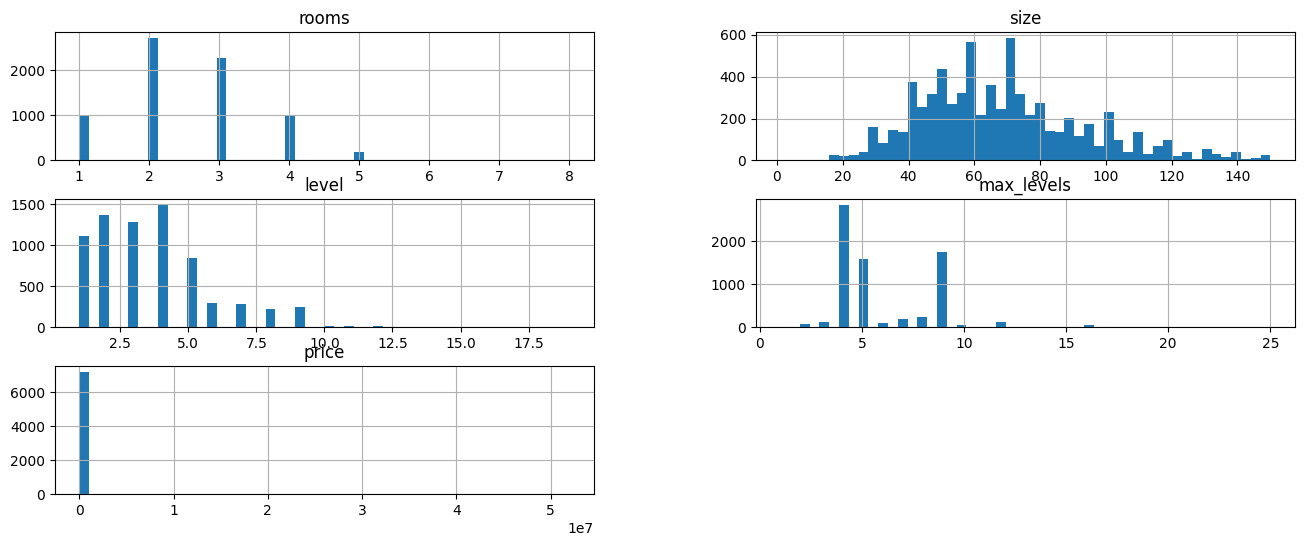

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=50, figsize=(16,6))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df,test_size=0.2, random_state=42)

In [51]:
a=df[df['price']<10000].index
df.drop(a,inplace=True)

In [54]:
df.corrwith(df['price']).sort_values(ascending=False)

<ipython-input-54-165692e52bde>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['price']).sort_values(ascending=False)


price         1.000000
rooms         0.044820
size          0.044780
max_levels    0.007035
level        -0.004636
dtype: float64

In [55]:
df_categorical = df[['district']]
df_categorical

,district
0,Юнусабадский
1,Яккасарайский
2,Чиланзарский
3,Чиланзарский
4,Чиланзарский
...,...
7560,Яшнободский
7561,Яшнободский
7562,Шайхантахурский
7563,Мирзо-Улугбекский


In [56]:
df_categorical.value_counts()

district         
Чиланзарский         1616
Мирзо-Улугбекский    1328
Учтепинский           873
Юнусабадский          844
Мирабадский           691
Яккасарайский         617
Яшнободский           452
Шайхантахурский       348
Олмазорский           255
Сергелийский          157
Янгихаётский           15
Бектемирский            8
dtype: int64

In [58]:
"""from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

df_cat_encoded = ordinal_encoder.fit_transform(df_categorical)
df_cat_encoded[:10]"""

array([[8.],
       [9.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [9.],
       [5.],
       [6.]])

In [61]:
"""from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_categorical)
df_cat_1hot.toarray()"""

'from sklearn.preprocessing import OneHotEncoder\n\ncat_encoder = OneHotEncoder()\ndf_cat_1hot = cat_encoder.fit_transform(df_categorical)\ndf_cat_1hot.toarray()'

In [74]:
df_onehot = pd.get_dummies(df['district'])
df_onehot[:10]
dfone=pd.DataFrame(df_onehot)
dfone.head(10)

,Бектемирский,Мирабадский,Мирзо-Улугбекский,Олмазорский,Сергелийский,Учтепинский,Чиланзарский,Шайхантахурский,Юнусабадский,Яккасарайский,Янгихаётский,Яшнободский
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,0,0


In [59]:
df_categorical.value_counts()

district         
Чиланзарский         1616
Мирзо-Улугбекский    1328
Учтепинский           873
Юнусабадский          844
Мирабадский           691
Яккасарайский         617
Яшнободский           452
Шайхантахурский       348
Олмазорский           255
Сергелийский          157
Янгихаётский           15
Бектемирский            8
dtype: int64

In [66]:
df.append(df_onehot)
df

<ipython-input-66-94d1fc8ae3df>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(df_onehot)


,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000.0
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000.0
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000.0
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500.0
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000.0
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.0,5,5,24500.0
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49.0,1,4,32000.0
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64.0,3,9,40000.0
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18.0,1,4,11000.0


In [81]:
pd.concat([df,dfone],axis=1)

,location,district,rooms,size,level,max_levels,price,Бектемирский,Мирабадский,Мирзо-Улугбекский,Олмазорский,Сергелийский,Учтепинский,Чиланзарский,Шайхантахурский,Юнусабадский,Яккасарайский,Янгихаётский,Яшнободский
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000.0,0,0,0,0,0,0,0,0,1,0,0,0
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000.0,0,0,0,0,0,0,0,0,0,1,0,0
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000.0,0,0,0,0,0,0,1,0,0,0,0,0
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500.0,0,0,0,0,0,0,1,0,0,0,0,0
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000.0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.0,5,5,24500.0,0,0,0,0,0,0,0,0,0,0,0,1
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49.0,1,4,32000.0,0,0,0,0,0,0,0,0,0,0,0,1
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64.0,3,9,40000.0,0,0,0,0,0,0,0,1,0,0,0,0
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18.0,1,4,11000.0,0,0,1,0,0,0,0,0,0,0,0,0


In [83]:
df = pd.concat([df,dfone],axis=1)

In [84]:
df

,location,district,rooms,size,level,max_levels,price,Бектемирский,Мирабадский,Мирзо-Улугбекский,Олмазорский,Сергелийский,Учтепинский,Чиланзарский,Шайхантахурский,Юнусабадский,Яккасарайский,Янгихаётский,Яшнободский
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000.0,0,0,0,0,0,0,0,0,1,0,0,0
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000.0,0,0,0,0,0,0,0,0,0,1,0,0
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000.0,0,0,0,0,0,0,1,0,0,0,0,0
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500.0,0,0,0,0,0,0,1,0,0,0,0,0
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000.0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.0,5,5,24500.0,0,0,0,0,0,0,0,0,0,0,0,1
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49.0,1,4,32000.0,0,0,0,0,0,0,0,0,0,0,0,1
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64.0,3,9,40000.0,0,0,0,0,0,0,0,1,0,0,0,0
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18.0,1,4,11000.0,0,0,1,0,0,0,0,0,0,0,0,0


In [105]:
df.corrwith(df['price']).sort_values(ascending=False)

<ipython-input-105-165692e52bde>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['price']).sort_values(ascending=False)


price                1.000000
size                 0.692995
rooms                0.513990
Мирабадский          0.259293
max_levels           0.229874
Яккасарайский        0.078896
level                0.063120
Шайхантахурский      0.053845
Юнусабадский         0.024934
Мирзо-Улугбекский   -0.015641
Янгихаётский        -0.023085
Бектемирский        -0.025088
Олмазорский         -0.030386
Сергелийский        -0.048549
Яшнободский         -0.056015
Учтепинский         -0.105462
Чиланзарский        -0.118434
dtype: float64

In [90]:
dfd=df[df['district']=="Учтепинский"]
dfd['price'].max()

52000000.0

In [91]:
df['price'].max()

52000000.0

In [93]:
dfs=df[df['district']=="Шайхантахурский"]
dfs['price'].max()

15504000.0

In [94]:
df.describe()

,rooms,size,level,max_levels,price,Бектемирский,Мирабадский,Мирзо-Улугбекский,Олмазорский,Сергелийский,Учтепинский,Чиланзарский,Шайхантахурский,Юнусабадский,Яккасарайский,Янгихаётский,Яшнободский
count,7204.000000,7204.000000,7204.000000,7204.000000,7.204000e+03,7204.000000,7204.000000,7204.000000,7204.000000,7204.000000,7204.000000,7204.000000,7204.000000,7204.000000,7204.000000,7204.000000,7204.000000
mean,2.551222,68.450963,3.679345,5.982232,6.677398e+04,0.001110,0.095919,0.184342,0.035397,0.021793,0.121183,0.224320,0.048306,0.117157,0.085647,0.002082,0.062743
std,0.996321,25.129036,2.229361,2.604200,6.512436e+05,0.033308,0.294500,0.387790,0.184794,0.146019,0.326362,0.417163,0.214428,0.321630,0.279861,0.045587,0.242517
min,1.000000,1.000000,1.000000,1.000000,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,50.000000,2.000000,4.000000,3.450000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,65.000000,3.000000,5.000000,4.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,82.000000,5.000000,9.000000,6.400000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,150.000000,19.000000,25.000000,5.200000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
dfp=df[df['price']>1000000].index
df.drop(dfp, inplace=True)

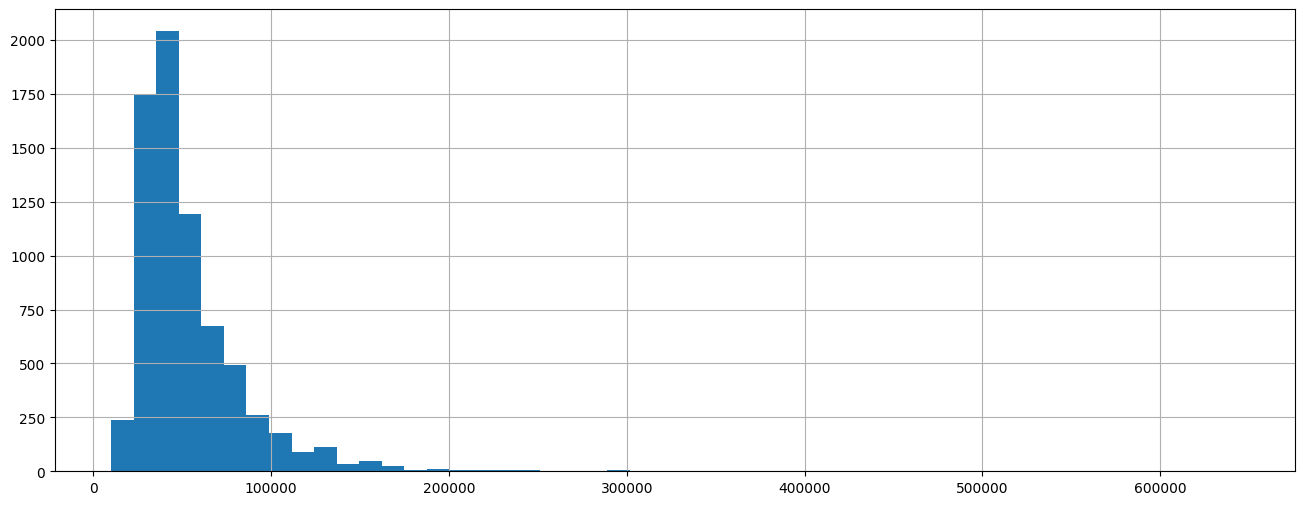

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
df['price'].hist(bins=50, figsize=(16,6))
plt.show()

In [115]:
df.corrwith(df['price']).sort_values(ascending=False)

<ipython-input-115-165692e52bde>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['price']).sort_values(ascending=False)


price                1.000000
size                 0.692995
rooms                0.513990
Мирабадский          0.259293
max_levels           0.229874
Яккасарайский        0.078896
level                0.063120
Шайхантахурский      0.053845
Юнусабадский         0.024934
Мирзо-Улугбекский   -0.015641
Янгихаётский        -0.023085
Бектемирский        -0.025088
Олмазорский         -0.030386
Сергелийский        -0.048549
Яшнободский         -0.056015
Учтепинский         -0.105462
Чиланзарский        -0.118434
dtype: float64

In [112]:
df[df['district']=="Мирабадский"]['price'].max()

330000.0

In [114]:
df[df['district']=="Яккасарайский"]['price'].max()

420000.0

In [117]:
df_num=df.drop('location',axis=1)

In [118]:
df_num

,district,rooms,size,level,max_levels,price,Бектемирский,Мирабадский,Мирзо-Улугбекский,Олмазорский,Сергелийский,Учтепинский,Чиланзарский,Шайхантахурский,Юнусабадский,Яккасарайский,Янгихаётский,Яшнободский
0,Юнусабадский,3,57.0,4,4,52000.0,0,0,0,0,0,0,0,0,1,0,0,0
1,Яккасарайский,2,52.0,4,5,56000.0,0,0,0,0,0,0,0,0,0,1,0,0
2,Чиланзарский,2,42.0,4,4,37000.0,0,0,0,0,0,0,1,0,0,0,0,0
3,Чиланзарский,3,65.0,1,4,49500.0,0,0,0,0,0,0,1,0,0,0,0,0
4,Чиланзарский,3,70.0,3,5,55000.0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7560,Яшнободский,1,38.0,5,5,24500.0,0,0,0,0,0,0,0,0,0,0,0,1
7561,Яшнободский,2,49.0,1,4,32000.0,0,0,0,0,0,0,0,0,0,0,0,1
7562,Шайхантахурский,2,64.0,3,9,40000.0,0,0,0,0,0,0,0,1,0,0,0,0
7563,Мирзо-Улугбекский,1,18.0,1,4,11000.0,0,0,1,0,0,0,0,0,0,0,0,0


In [119]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit_transform(df_num)

ValueError: ignored

In [120]:
df_num_2 = df_num.drop('district',axis=1)

In [121]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit_transform(df_num_2)

array([[ 0.4507956 , -0.45530845,  0.14358767, ..., -0.30626379,
        -0.04570707, -0.25829457],
       [-0.55275463, -0.65427804,  0.14358767, ...,  3.26515914,
        -0.04570707, -0.25829457],
       [-0.55275463, -1.05221722,  0.14358767, ..., -0.30626379,
        -0.04570707, -0.25829457],
       ...,
       [-0.55275463, -0.17675103, -0.30500689, ..., -0.30626379,
        -0.04570707, -0.25829457],
       [-1.55630487, -2.00727124, -1.20219602, ..., -0.30626379,
        -0.04570707, -0.25829457],
       [-1.55630487, -1.52974423, -0.75360146, ..., -0.30626379,
        -0.04570707, -0.25829457]])